In [1]:
#K-Means clustering Distance  , Centroid: distance calculated and decide which centroied cluster near by distance

In [2]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from umap import UMAP
import tensorflow as tf

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')


In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
#X = dataset.iloc[:, 3:5].values
#a:,b =all rows of a , b is columns
#3 and 4  is 3:5(start index 3, and exclusive of the stop index 5).
#Annual Income (k$) =3,Spending Score (1-100)=4 ,index [0]=Age
X = dataset.iloc[:, 3:5]

In [6]:
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


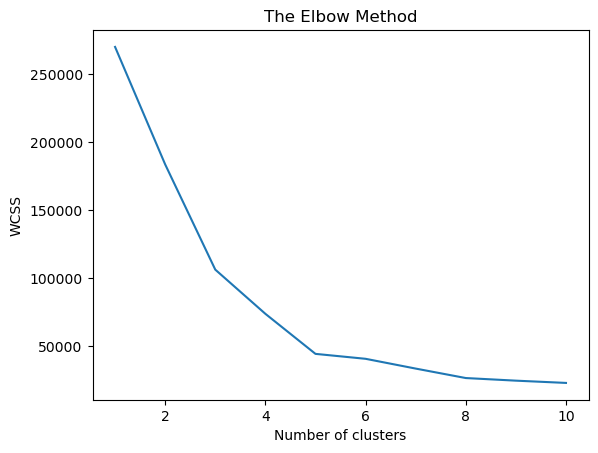

In [7]:
from sklearn.cluster import KMeans
list1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    list1.append(kmeans.inertia_)
plt.plot(range(1, 11), list1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
## 1. Elbow Method for K-Means
#wcss = []
#for i in range(1, 11):
    #kmeans = KMeans(n_clusters=i, random_state=42)
    #kmeans.fit(X)
    #wcss.append(kmeans.inertia_)

#plt.figure(figsize=(6, 4))
#plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
#plt.title("Elbow Method for K-Means")
#plt.xlabel("Number of Clusters")
#plt.ylabel("WCSS")
#plt.show()

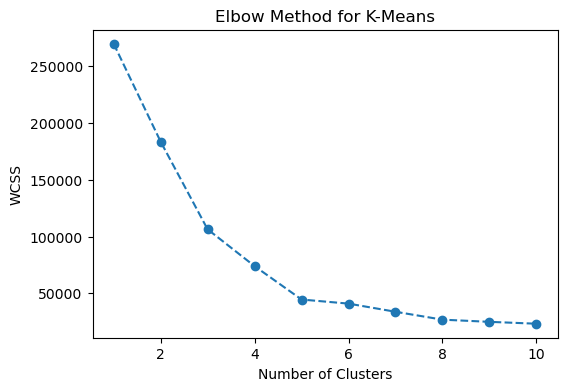

In [8]:
# 1. Elbow Method for K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

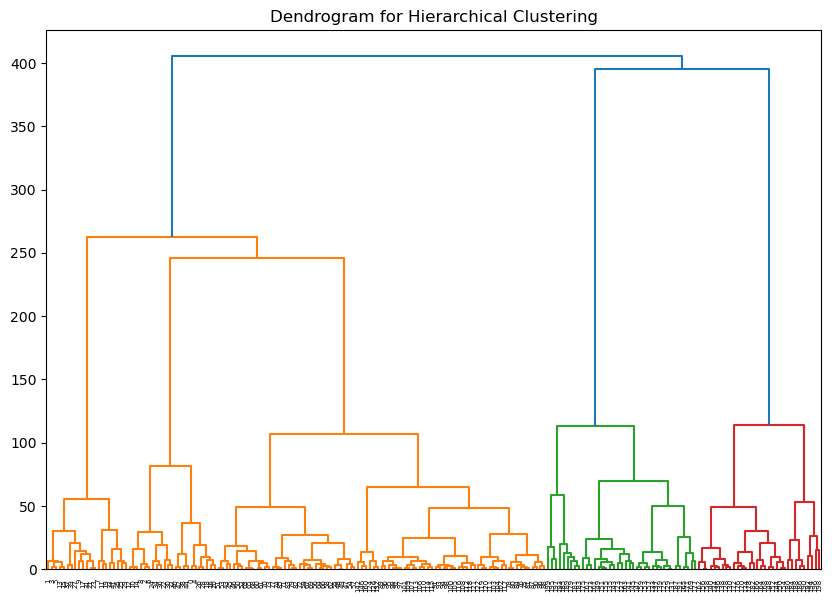

In [9]:
# 2. Dendrogram for Hierarchical Clustering
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

In [10]:
# 3. Silhouette Analysis for K-Means
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score for K-Means: {silhouette_avg:.2f}")

Silhouette Score for K-Means: 0.49


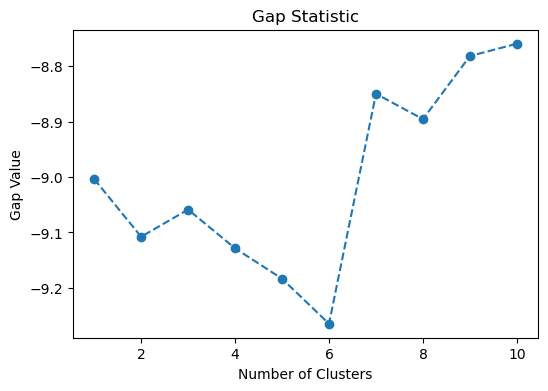

In [11]:
# 4. Gap Statistic Method (Basic Approximation)
from sklearn.utils import resample
def gap_statistic(data, n_clusters, n_refs=10):
    ref_disps = []
    for _ in range(n_refs):
        random_ref = np.random.random_sample(size=data.shape)
        km = KMeans(n_clusters=n_clusters)
        km.fit(random_ref)
        ref_disps.append(km.inertia_)
    
    km = KMeans(n_clusters=n_clusters)
    km.fit(data)
    orig_disp = km.inertia_
    
    gap = np.log(np.mean(ref_disps)) - np.log(orig_disp)
    return gap

gaps = [gap_statistic(X, k) for k in range(1, 11)]
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), gaps, marker='o', linestyle='--')
plt.title("Gap Statistic")
plt.xlabel("Number of Clusters")
plt.ylabel("Gap Value")
plt.show()

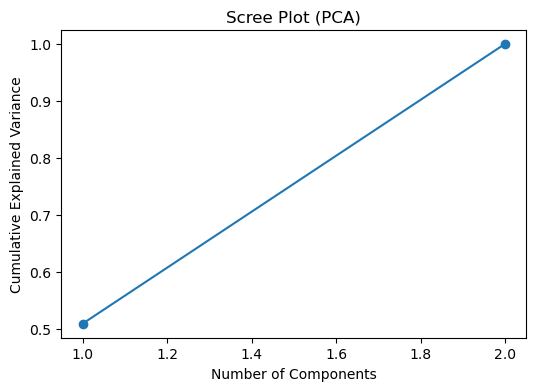

In [15]:
# 5. Scree Plot for PCA
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title("Scree Plot (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

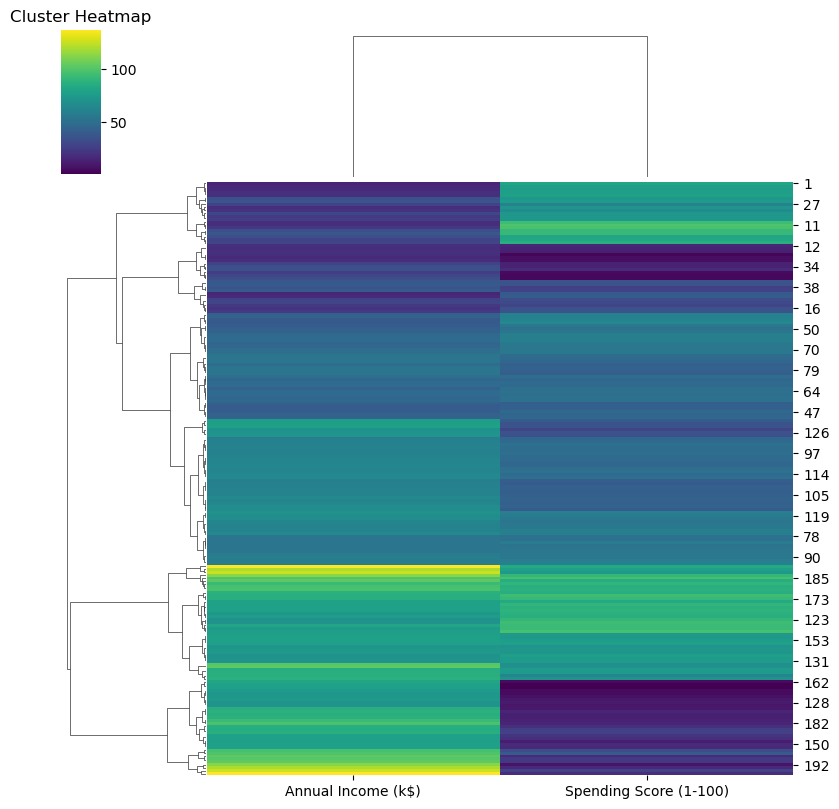

In [12]:
# 6. Cluster Heatmap for Hierarchical Clustering
sns.clustermap(pd.DataFrame(X), method='ward', cmap='viridis', figsize=(8, 8))
plt.title("Cluster Heatmap")
plt.show()

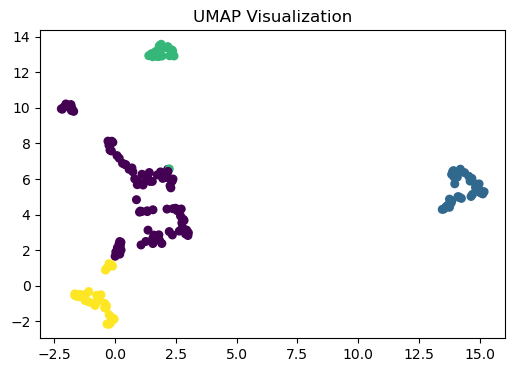

In [13]:
# 7. t-SNE/UMAP Visualization
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)
plt.figure(figsize=(6, 4))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans.labels_, cmap='viridis', s=30)
plt.title("UMAP Visualization")
plt.show()

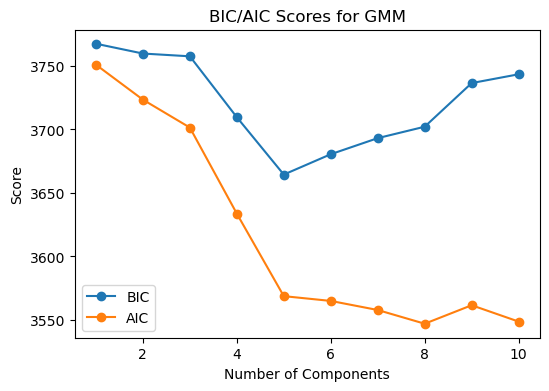

In [14]:
# 8. BIC/AIC Plot for GMM
bic_scores = []
aic_scores = []
for n in range(1, 11):
    gmm = GaussianMixture(n_components=n, random_state=42).fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), bic_scores, label='BIC', marker='o')
plt.plot(range(1, 11), aic_scores, label='AIC', marker='o')
plt.title("BIC/AIC Scores for GMM")
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.legend()
plt.show()

In [19]:
# Generate synthetic data --use tjis if no csv otr database not loaded 
#X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)






In [20]:
#K-Means: The elbow method is visualized, and clustering results are displayed.
#Agglomerative Clustering: The dendrogram is plotted, and clusters are visualized.
#Affinity Propagation: Labels are obtained based on exemplars.
#Mean Shift: Bandwidth is automatically chosen for clustering.
#Spectral Clustering: Uses a nearest-neighbors graph for clustering.
#DBSCAN: Identifies clusters based on density.
#OPTICS: Handles varying densities, providing clustering labels.
#BIRCH: Uses a tree structure to group data points efficiently.

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import (
    KMeans,
    AgglomerativeClustering,
    AffinityPropagation,
    MeanShift,
    SpectralClustering,
    DBSCAN,
    OPTICS,
    Birch,
)

In [16]:
list1

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518778,
 24766.471609793443,
 23103.122085983916]

In [17]:
#from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [18]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [19]:
# 2.Create an instance of AgglomerativeClustering with the desired number of clusters
aggcls = AgglomerativeClustering(n_clusters=5)

# Fit the model and predict cluster labels
Aggcls= aggcls.fit_predict(X) #label

In [20]:
 #3. Affinity Propagation - Similarity Matrix
from sklearn.metrics.pairwise import cosine_similarity
# Extracting the feature matrix
#X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
# Compute a similarity matrix (cosine similarity is one option)
similarity_matrix = cosine_similarity(X)

# Verify the similarity matrix is square
assert similarity_matrix.shape[0] == similarity_matrix.shape[1], "Similarity matrix must be square."

# Affinity Propagation model
affinity = AffinityPropagation(affinity='precomputed', random_state=42)

# Fit the model
aff = affinity.fit(similarity_matrix)

In [21]:
#4.Meanshiftcluster
ms=MeanShift(bandwidth=2).fit(X)
ms_cl=ms.fit_predict(X)

In [22]:
#5.Spectraclustering
sc=SpectralClustering(n_clusters=4, random_state=42, affinity='nearest_neighbors').fit(X)
sc_cl=sc.fit_predict(X)

In [23]:
# 6. DBSCAN - eps and min_samples tunin
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
db_cl=dbscan.fit_predict(X)

In [24]:
# 7. OPTICS - Reachability Plot
optics = OPTICS(min_samples=5).fit(X)
opt_cl=optics.fit_predict(X)

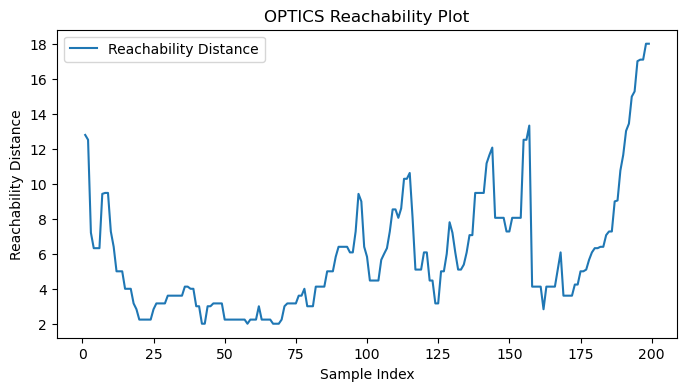

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(optics.reachability_[optics.ordering_], label="Reachability Distance")
plt.title('OPTICS Reachability Plot')
plt.xlabel('Sample Index')
plt.ylabel('Reachability Distance')
plt.legend()
plt.show()

In [26]:
# 8. BIRCH - Clustering Feature Tree
birch = Birch(n_clusters=4).fit(X)
bir_cl=birch.fit_predict(X)

In [ ]:
#here using kmeans

In [27]:
new_ds=dataset

In [28]:
new_ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
#added new column to dataset
new_ds['Cluster_group']=y_kmeans

In [30]:
new_ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [31]:
new_ds.to_csv("cluster.csv",index=False)
#created new csv file in same folder with updated new column along eith existing dataset columns

In [ ]:
#dir(kmeans)

In [32]:
centroids=kmeans.cluster_centers_

In [33]:
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [ ]:
#y_kmeans

In [34]:
new_ds.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

In [35]:
new_ds.columns[3]

'Annual Income (k$)'

In [36]:
#!pip install seaborn

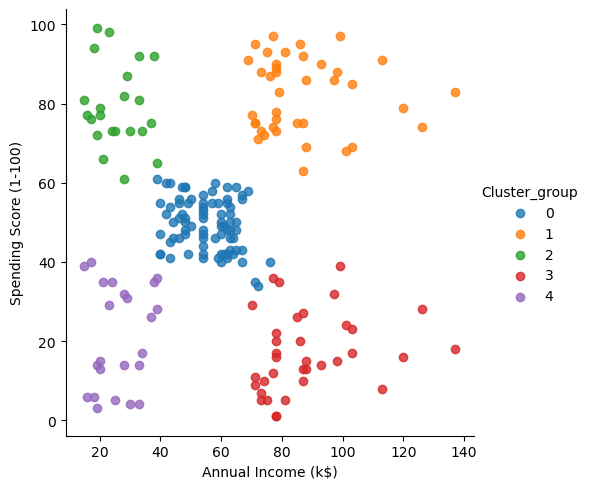

In [37]:
import seaborn as sns
facet = sns.lmplot(data=new_ds, x=new_ds.columns[3], y=new_ds.columns[4], hue=new_ds.columns[5],
                   fit_reg=False,legend_out=True)

In [38]:
#2.Agg
new_ds['Cluster_group']=Aggcls

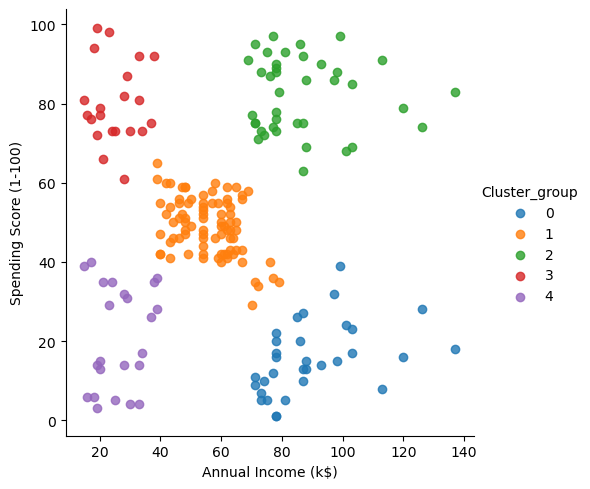

In [39]:
#import seaborn as sns
facet = sns.lmplot(data=new_ds, x=new_ds.columns[3], y=new_ds.columns[4], hue=new_ds.columns[5],
                   fit_reg=False,legend_out=True)

In [41]:
##3. Affinity Propagation - Similarity Matrix
new_ds['Cluster_group']=aff

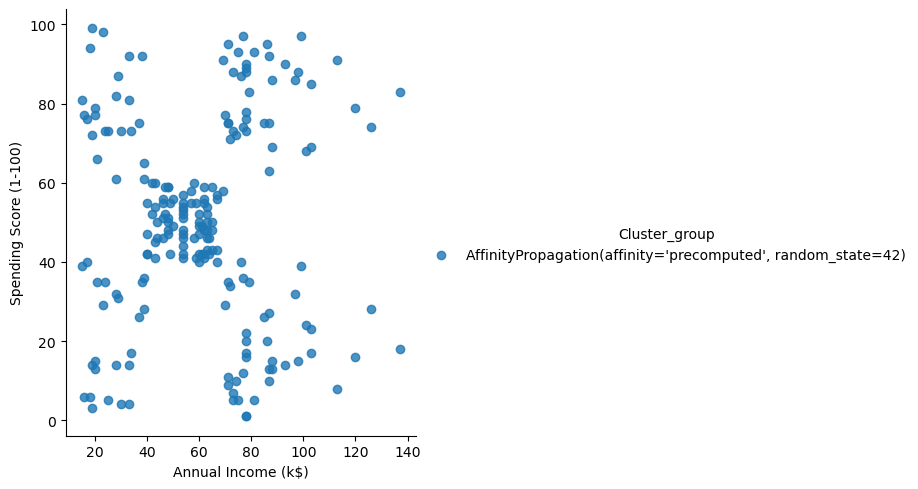

In [42]:
#import seaborn as sns
facet = sns.lmplot(data=new_ds, x=new_ds.columns[3], y=new_ds.columns[4], hue=new_ds.columns[5],
                   fit_reg=False,legend_out=True)

In [43]:
#4.Meanshiftcluster
new_ds['Cluster_group']=ms_cl

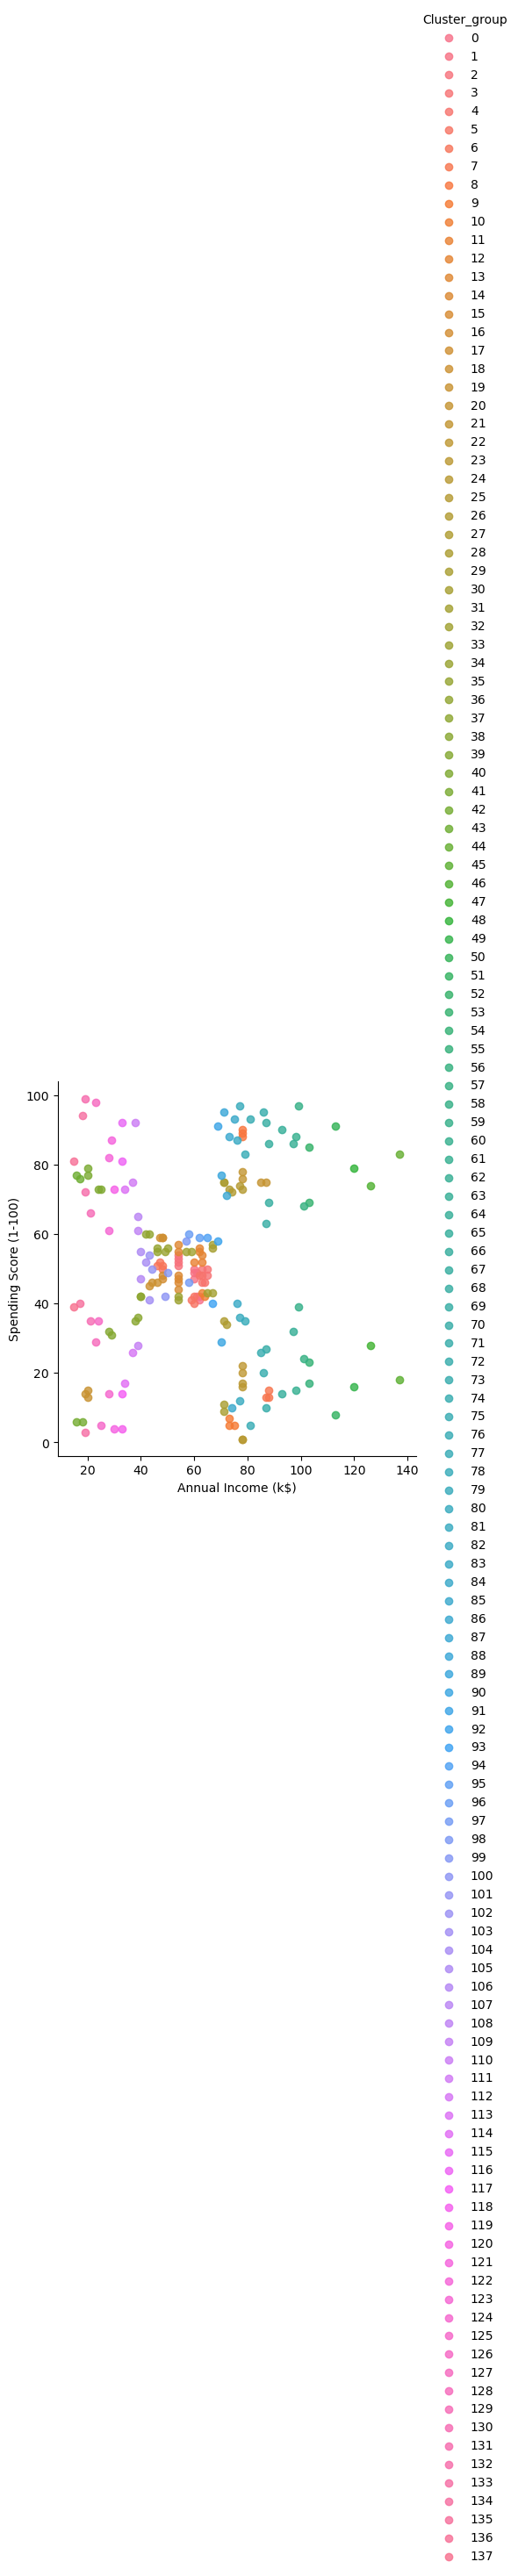

In [44]:
#import seaborn as sns
facet = sns.lmplot(data=new_ds, x=new_ds.columns[3], y=new_ds.columns[4], hue=new_ds.columns[5],
                   fit_reg=False,legend_out=True)

In [45]:
#5.Spectraclustering
new_ds['Cluster_group']=sc_cl

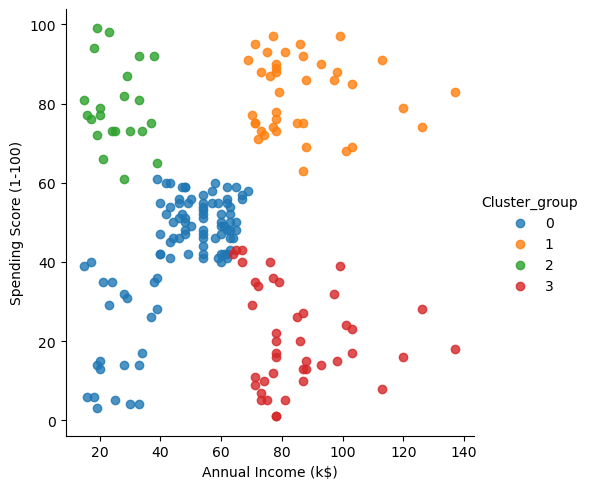

In [46]:
#import seaborn as sns
facet = sns.lmplot(data=new_ds, x=new_ds.columns[3], y=new_ds.columns[4], hue=new_ds.columns[5],
                   fit_reg=False,legend_out=True)

In [47]:
# 6. DBSCAN - eps and min_samples tunin
new_ds['Cluster_group']=db_cl

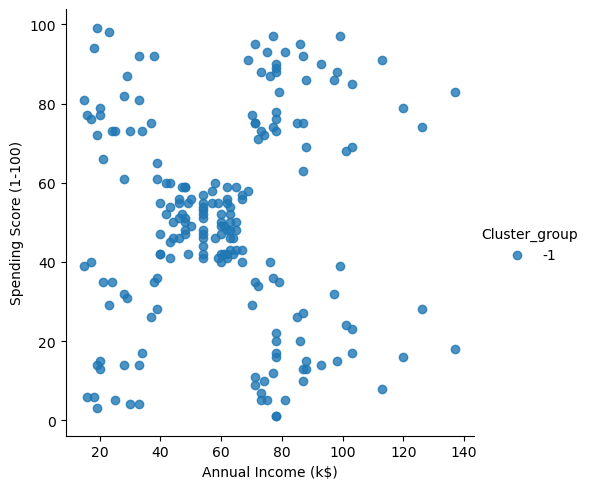

In [48]:
#import seaborn as sns
facet = sns.lmplot(data=new_ds, x=new_ds.columns[3], y=new_ds.columns[4], hue=new_ds.columns[5],
                   fit_reg=False,legend_out=True)

In [49]:
# 7. OPTICS - Reachability Plot
new_ds['Cluster_group']=opt_cl

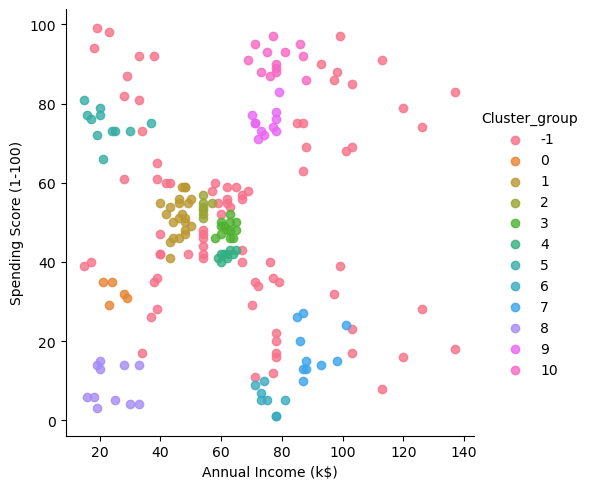

In [50]:
#import seaborn as sns
facet = sns.lmplot(data=new_ds, x=new_ds.columns[3], y=new_ds.columns[4], hue=new_ds.columns[5],
                   fit_reg=False,legend_out=True)

In [51]:
# 8. BIRCH - Clustering Feature Tree
new_ds['Cluster_group']=bir_cl

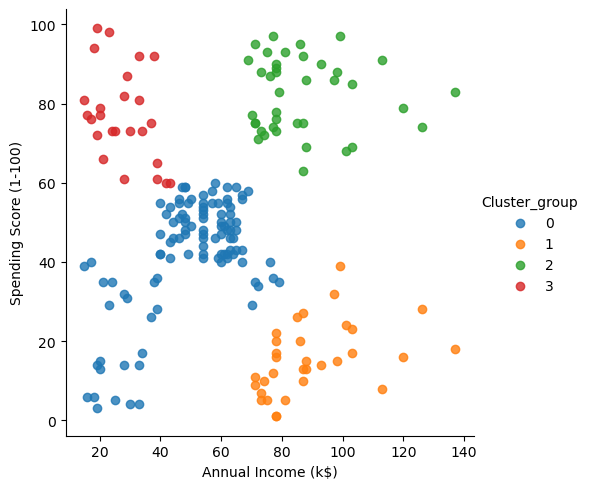

In [52]:
#import seaborn as sns
facet = sns.lmplot(data=new_ds, x=new_ds.columns[3], y=new_ds.columns[4], hue=new_ds.columns[5],
                   fit_reg=False,legend_out=True)